# Bank Notes Classification with SVM


## Description of the data:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

We will compare the SVM vs The Perceptron Models based on their convergence time

In [2]:
from symbol import import_as_name
import numpy as np
import os
import pandas as pd
import sys
import sklearn.metrics

sys.path.append("C:/Users/teddy/Downloads/Machine Learning/Perceptron HW/Perceptron Sub.ipynb")



dataset = pd.read_csv("C:/Users/teddy/Downloads/Machine Learning/Perceptron HW/BankNote_Authentication.csv")

dataset.tail()

C:\Users\teddy\AppData\Local\Temp/ipykernel_9432/3341257769.py:1: DeprecationWarning: The symbol module is deprecated and will be removed in future versions of Python
  from symbol import import_as_name


,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [3]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print("Errors: ", errors) #LS
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    def score(self, X, y):
        y = self.predict(X)
        return sklearn.metrics.mean_squared_error(X, y)

In [4]:

#X = dataset.iloc[:,0:2]
X = dataset.iloc[:, [0, 2]]
y = dataset.iloc[:,4]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [5]:
ppn = Perceptron(eta=0.001, n_iter=10)
X = dataset.iloc[:, [0, 2]].values
y = dataset.iloc[:,4].values

ppn.fit(X, y)

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    #edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

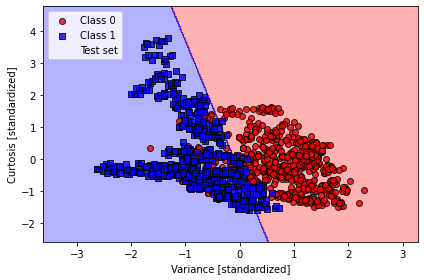

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(600, 800))
plt.xlabel('Variance [standardized]')
plt.ylabel('Curtosis [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

SVM Convergence Time Stats


Perceptron Convergence Time Stats

In [8]:
from sklearn.model_selection import cross_val_score
#Creating a classifier
classifier = SVC(kernel='rbf', random_state=1, gamma=1, C=100000.0)
#Training the model using classifier
classifier.fit(X_train_std, y_train)
#Getting cross validation score to preX_train_std, y_traindict the model accuracy
scores = cross_val_score(classifier,, cv=5)
print('Accuracy: %0.4f (+/- %0.4f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8809 (+/- 0.0422)


In [11]:
from sklearn.linear_model import Perceptron

from sklearn.model_selection import cross_val_score
#Creating a classifier
classifier =  Perceptron(eta0=0.1, random_state=1)
#Training the model using classifier
classifier.fit(X_train_std, y_train)
scores = cross_val_score(classifier, X_train_std, y_train, cv=5)
print('Accuracy: %0.4f (+/- %0.4f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.7849 (+/- 0.1434)


## The SVM model has an accuracy of 0.8809 (+/- 0.0422) 
## The Perceptron mode has an accuracy of Accuracy: 0.7849 (+/- 0.1434)
## The SVM model proves to more efficient.